In [41]:
import ultralytics
from ultralytics import YOLO

model=YOLO("models\yolov8_100epochs.pt")

results=model.predict("test.jpeg")



<>:4: SyntaxWarning: invalid escape sequence '\y'
<>:4: SyntaxWarning: invalid escape sequence '\y'
C:\Users\tomas\AppData\Local\Temp\ipykernel_15540\1881170721.py:4: SyntaxWarning: invalid escape sequence '\y'
  model=YOLO("models\yolov8_100epochs.pt")



image 1/1 c:\Users\tomas\OneDrive\Desktop\facultad\5to_cuatrimestre\Vision_por_computadora\tp-final-cv2\Card-Detection\test.jpeg: 640x640 1 1O, 1 1C, 1 4O, 1 5O, 1 7E, 1 8C, 1 12C, 1 12E, 563.3ms
Speed: 19.8ms preprocess, 563.3ms inference, 17.9ms postprocess per image at shape (1, 3, 640, 640)


In [2]:
!yolo predict model="100epochs_yolov8.pt" source="test3.jpeg" 

Ultralytics YOLOv8.2.42 🚀 Python-3.12.2 torch-2.2.1+cpu CPU (Intel Core(TM) i5-10210U 1.60GHz)
Model summary (fused): 168 layers, 3015203 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 c:\Users\tomas\OneDrive\Desktop\facultad\5to_cuatrimestre\Vision_por_computadora\tp-final-cv2\Card-Detection\test3.jpeg: 640x512 1 3O, 1 6E, 1 7O, 1 7B, 1 8O, 1 8E, 1 10B, 2 11Bs, 1 J, 265.4ms
Speed: 5.5ms preprocess, 265.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs\detect\predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [42]:
COPA=['1C','2C','3C','4C','5C','6C','7C','8C','9C','10C','11C','12C']
ORO=['1O','2O','3O','4O','5O','6O','7O','8O','9O','10O','11O','12O']
ESPADA = ['1E', '2E', '3E', '4E', '5E', '6E', '7E', '8E', '9E', '10E', '11E', '12E']
BASTO = ['1B', '2B', '3B', '4B', '5B', '6B', '7B', '8B', '9B', '10B', '11B', '12B']

In [72]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np


def get_color_for_class(class_name):
    if 'O' in class_name:
        return (255, 255, 0)  # Amarillo
    elif 'E' in class_name:
        return (0, 0, 255)  # Azul
    elif 'B' in class_name:
        return (0, 255, 0)  # Verde
    elif 'C' in class_name:
        return (255, 0, 0)  # Rojo
    elif 'J' in class_name:
        return (255, 0, 255)  # Violeta
    else:
        return (255, 255, 255)  # Blanco por defecto

def detect_and_show_cards_in_image(
        image_path: str, model_path: str, class_names: dict[int,str], confidence_threshold: float=0.4
        ) -> list[str]:
    cards_found = []
    # Cargar el modelo YOLOv8
    model = YOLO(model_path)
    
    # Cargar la imagen
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Realizar la detección
    results = model.predict(image_rgb, conf=confidence_threshold)
    
    # Dibujar los bounding boxes en la imagen
    for result in results[0].boxes.data:
        x1, y1, x2, y2, conf, class_id = result
        if conf >= confidence_threshold:  # Filtrar por umbral de confianza
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            class_id = int(class_id)
            class_name = class_names[class_id]
            label = f'{class_name} {conf:.2f}'
            cards_found.append(class_name)
            color = get_color_for_class(class_name)
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, 2)
            cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    # Mostrar la imagen con los bounding boxes
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

    return cards_found




In [44]:
def sumar_envido(mismo_palo: list[str]) -> int|str:
    numeros=[]
    carta_blanca=["10","11","12"]

    if len(mismo_palo)<2 or len(mismo_palo)>4:
        return "You are not playing Truco"

    for carta in mismo_palo:
        num = ''.join(c for c in carta if c.isdigit())
        if num in carta_blanca:
            numeros.append(20)
        else:
            numeros.append(int(num))

    if sum(numeros)==40 or sum(numeros)==60:
        return 20
    elif 20 in numeros:
        return sum(set(numeros))
    else:
        return sum(numeros)+20
            
        




   
    

In [61]:
def cantar_envido(cartas: list[str]) -> str:
    
    if len(cartas)==0 or len(cartas)>3:
        return "You are not playing Truco"
    
    copa=[]
    oro=[]
    espada=[]
    basto=[]
    
    for carta in cartas:
        if carta in COPA:
            copa.append(carta)
        elif carta in ORO:
            oro.append(carta)
        elif carta in ESPADA:
            espada.append(carta)
        elif carta in BASTO:
            basto.append(carta)

    for palo,nombre in [(copa,"Copa"),(oro,"Oro"),(basto,"Basto"),(espada,"Espada")]:
        if len(palo) == 2:
            tantos=sumar_envido(palo)
            return f"Canta envido con {nombre}, ya que tenemos {tantos} puntos"
        
        elif len(palo) == 3:
            tantos=sumar_envido(palo)
            return f"Canta flor con {nombre}, ya que tenemos {tantos} puntos"

In [46]:
sumar_envido(["12C"])

'You are not playing Truco'

In [26]:
sumar_envido(["1E","2E","7E"])

30

In [16]:
sumar_envido(["1O","12O"])

21

In [20]:
sumar_envido(["12C","10C","7C"])

27

In [21]:
sumar_envido(["1C","2C","3C"])

26

<>:3: SyntaxWarning: invalid escape sequence '\y'
<>:3: SyntaxWarning: invalid escape sequence '\y'
C:\Users\tomas\AppData\Local\Temp\ipykernel_15540\3809653699.py:3: SyntaxWarning: invalid escape sequence '\y'
  model_path = 'models\yolov8_100epochs.pt'



0: 640x640 1 1O, 1 1C, 1 4O, 1 5O, 1 7E, 1 8C, 1 12C, 1 12E, 431.8ms
Speed: 9.6ms preprocess, 431.8ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)


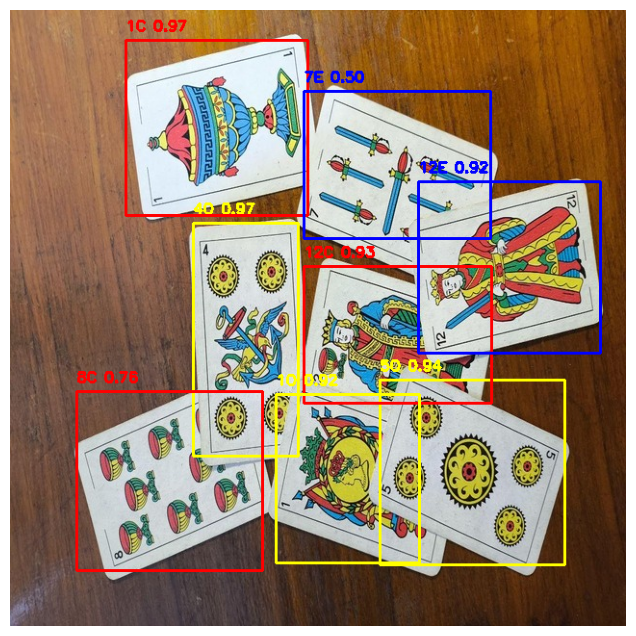

In [73]:
# Ejemplo de uso
image_path = 'test.jpeg'
model_path = 'models\yolov8_100epochs.pt'

cartas_mano=detect_and_show_cards_in_image(image_path, model_path,model.names)

In [67]:
cantar_envido(cartas_mano)

'You are not playing Truco'

In [5]:
def detect_and_show_cards_real_time(model_path, class_names):
    # Cargar el modelo YOLOv8
    model = YOLO(model_path)

    # Capturar video de la cámara
    cap = cv2.VideoCapture(0)  # Usa 0 para la cámara por defecto
    
    if not cap.isOpened():
        print("Error: No se puede abrir la cámara")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: No se puede recibir frame (fin del stream?)")
            break

        # Realizar la detección
        results = model(frame)
        
        # Dibujar los bounding boxes en la imagen
        for result in results[0].boxes.data:
            x1, y1, x2, y2, conf, class_id = result
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            class_id = int(class_id)
            class_name = class_names[class_id]
            label = f'{class_name} {conf:.2f}'
            color = get_color_for_class(class_name)
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        
        # Mostrar el frame con los bounding boxes
        cv2.imshow('Detección de Cartas en Tiempo Real', frame)
        
        # Salir con la tecla 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Liberar el recurso de captura y cerrar ventanas
    cap.release()
    cv2.destroyAllWindows()


In [ ]:
detect_and_show_cards_real_time("100epochs_yolov8.pt",model.names)


0: 640x640 1 1O, 1 1C, 1 4O, 1 5O, 1 7E, 1 8C, 1 12C, 1 12E, 302.5ms
Speed: 10.7ms preprocess, 302.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


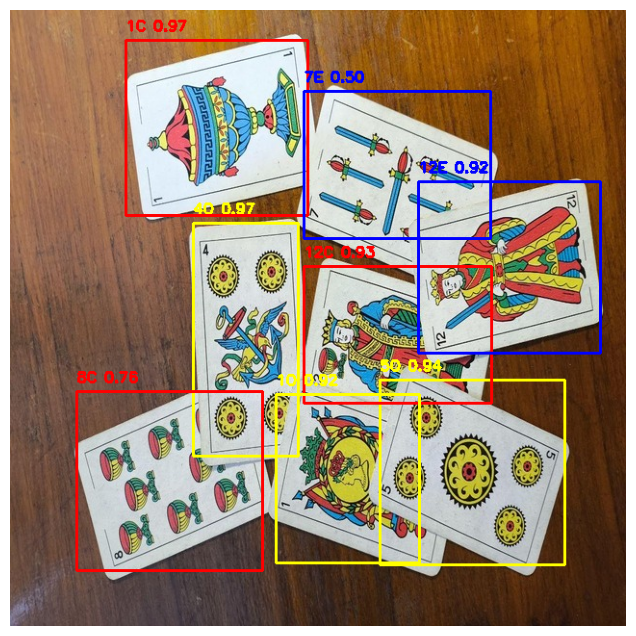

['4O', '1C', '5O', '12C', '12E', '1O', '8C', '7E']

In [4]:
from models import DetectCards

DetectCards.detect_and_show_cards_in_image(image_path="test.jpeg")